In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as smf
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import files
uploaded=files.upload()

Saving delivery_time.csv to delivery_time.csv


#Simple Linear Regression on Delivery Data


In [6]:
df=pd.read_csv('delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [8]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [9]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [34]:
df.var()

Delivery Time    25.754619
Sorting Time      6.461905
dtype: float64

Both variables has good correlation

In [10]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

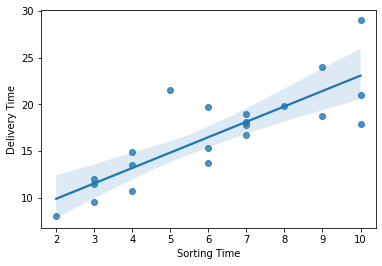

In [11]:
sns.regplot(x=df['Sorting Time'],y=df['Delivery Time'])

There is good correlation between 2 variables and score is more than 0.8 which is good sign

Text(0.5, 1.0, 'Delivery Time')

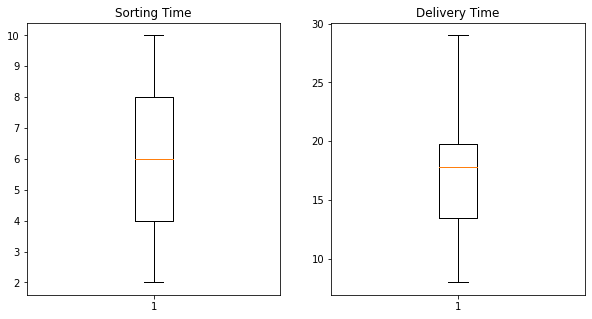

In [12]:
plt.subplots(figsize=(10,5))
plt.subplot(121)
plt.boxplot(df['Sorting Time'])
plt.title('Sorting Time')
plt.subplot(122)
plt.boxplot(df['Delivery Time'])
plt.title('Delivery Time')

There are no Outliers in the data

<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

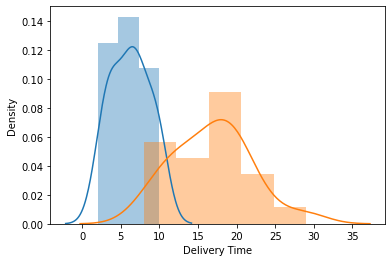

In [13]:
sns.distplot(df['Sorting Time'],kde=True)
sns.distplot(df['Delivery Time'],kde=True)

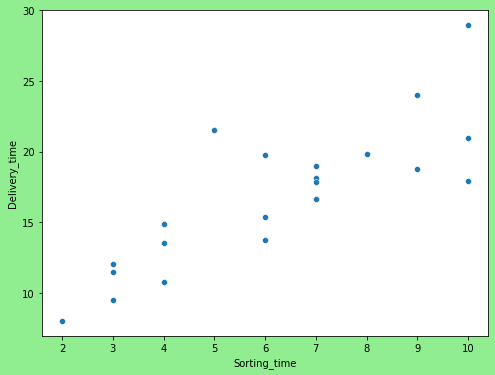

In [59]:
plt.figure(figsize=(8,6),facecolor = 'lightgreen')
sns.scatterplot(x=df['Sorting_time'],y=df['Delivery_time'])
plt.show()

In [48]:
df.rename(columns={"Delivery Time":"Delivery_time","Sorting Time":"Sorting_time"},inplace=True)
df.head()

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [56]:
model= sm.ols('Delivery_time~Sorting_time', data =df).fit()

In [57]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           3.98e-06
Time:                        04:53:20   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
#Square Root transformation on data
model1=sm.ols('np.sqrt(Delivery_time)~np.sqrt(Sorting_time)',data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(Delivery_time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Fri, 10 Mar 2023   Prob (F-statistic):           8.48e-07
Time:                            05:25:21   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(Sorting_time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
#Cube Root transformation on data
model2=sm.ols('np.cbrt(Delivery_time)~np.cbrt(Sorting_time)',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(Delivery_time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Fri, 10 Mar 2023   Prob (F-statistic):           4.90e-07
Time:                            05:28:37   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(Sorting_time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
#Log transformation on data
model3=sm.ols('np.log(Delivery_time)~np.log(Sorting_time)',data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Fri, 10 Mar 2023   Prob (F-statistic):           1.60e-07
Time:                           05:30:17   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
#model testing
model.params

Intercept       6.582734
Sorting_time    1.649020
dtype: float64

In [67]:
print(model.tvalues,'\n',model.pvalues)

Intercept       3.823349
Sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_time    0.000004
dtype: float64


(Intercept) Beta0: tvalue=3.82 , pvalue=0.001147

(daily) Beta1: tvalue=6.38, pvalue=0.000004

As (pvalue=0)<(α=0.05); Reject Null hyp. Thus, X(Sorting Time) variable has good slope and variance w.r.t Y(Delivery Time) variable.

R-squared measures the strength of the relationship between your model and the dependent variable on a 0 – 100% scale.

Measure goodness-of-fit by finding rsquared values (percentage of variance)


In [68]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

Determination Coefficient = rsquared value = 0.68 ; very good fit >= 85%

In [69]:
from sklearn.metrics import mean_squared_error

In [71]:
model1_pred_y =np.square(model1.predict(df['Sorting_time']))
model2_pred_y =pow(model2.predict(df['Sorting_time']),3)
model3_pred_y =np.exp(model3.predict(df['Sorting_time']))

In [72]:
model1_rmse =np.sqrt(mean_squared_error(df['Delivery_time'], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(df['Delivery_time'], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(df['Delivery_time'], model3_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)

model= 2.934903768890139 
model1= 2.762294279320867 
model2= 2.755584309893576 
model3= 2.745828897614548


In [73]:
data = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model3_rmse, 'model3' : model3_rmse}
min(data, key=data.get)

'model2'

As model2 has the minimum RMSE and highest Adjusted R-squared score. Hence, we are going to use model2 to predict our values

Model2 is the model where we did log transformation on both dependent variable as well as on independent variable

In [75]:
#Predicting values from Model with Log Transformation on the Data
predicted = pd.DataFrame()
predicted['Sorting_time'] = df.Sorting_time
predicted['Delivery_time'] = df.Delivery_time
predicted['Predicted_Delivery_time'] = pd.DataFrame(np.exp(model2.predict(predicted.Sorting_time)))
predicted

,Sorting_time,Delivery_time,Predicted_Delivery_time
0,10,21.00,17.035997
1,4,13.50,10.547128
2,6,19.75,12.808396
3,9,24.00,15.997918
4,10,29.00,17.035997
5,6,15.35,12.808396
6,7,19.00,13.889274
7,3,9.50,9.328887
8,10,17.90,17.035997
9,9,18.75,15.997918


In [76]:
#Predicitng from Original Model without any data transformation
predicted1 = pd.DataFrame()
predicted1['Sorting_time'] = df.Sorting_time
predicted1['Delivery_time'] = df.Delivery_time
predicted1['Predicted_Delivery_time'] = pd.DataFrame(model.predict(predicted1.Sorting_time))
predicted1

,Sorting_time,Delivery_time,Predicted_Delivery_time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913


#Simple Linear Regression on Salary Data

In [77]:
from google.colab import files
uploaded=files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [79]:
df2=pd.read_csv('Salary_Data.csv')
df2.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [80]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


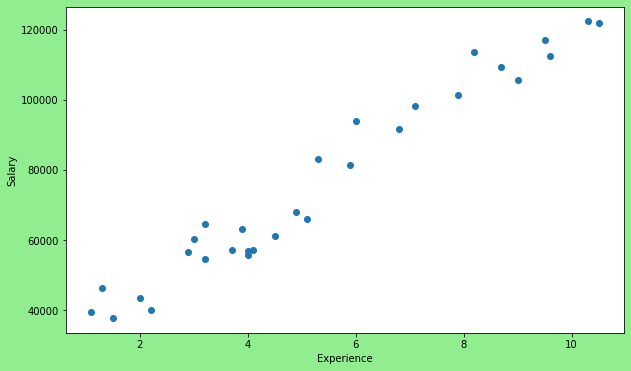

In [81]:
plt.figure(figsize=(10,6),facecolor="lightgreen")
plt.scatter(df2["YearsExperience"],df2["Salary"])
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

In [82]:
df2.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

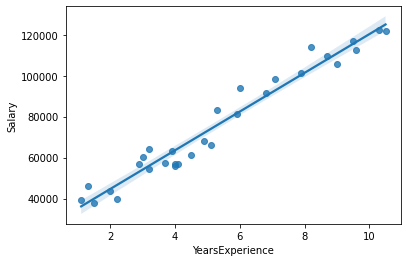

In [83]:
sns.regplot(x='YearsExperience',y='Salary',data=df2)

In [86]:
df2_M1=sm.ols("Salary ~ YearsExperience",data=df2).fit()
df2_M1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           1.14e-20
Time:                        05:54:34   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
df2_M1.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [89]:
#Log transformation on data
df2_M2=sm.ols("Salary ~np.log(YearsExperience)",data=df2).fit()
df2_M2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           3.25e-13
Time:                        05:56:51   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
df2_M2.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [93]:
#Log transformation on data
df2_M3=sm.ols("np.log(Salary) ~ YearsExperience",data=df2).fit()
df2_M3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           7.03e-18
Time:                        05:58:22   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
df2_M3.params

Intercept          10.507402
YearsExperience     0.125453
dtype: float64

In [98]:
#adding Squared on dependent variable
df2["ExpSquared"]=df2["YearsExperience"]**2
df2_M4=sm.ols("Salary ~ YearsExperience+ExpSquared",data=df2).fit()
df2_M4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     300.3
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           3.59e-19
Time:                        06:00:54   Log-Likelihood:                -301.43
No. Observations:                  30   AIC:                             608.9
Df Residuals:                      27   BIC:                             613.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.621e+04   4554.674      5.756      0.000    1.69e+04    3.56e+04
YearsExperience  9259.2839   1811.007      5.113      0.000    5543.405     1.3e+04
ExpSquared         16.3926    152.121      0.108      0.915    -295.734     328.520
==============================================================================
Omnibus:                        2.181   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                1.627
Skew:                           0.384   Prob(JB):                        0.443
Kurtosis:                       2.156   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
Models=pd.DataFrame({"Models":["M1","M2","M3","M4"],
                     "R2_Scores":[df2_M1.rsquared,df2_M2.rsquared,df2_M3.rsquared,df2_M4.rsquared]})
Models


,Models,R2_Scores
0,M1,0.956957
1,M2,0.853889
2,M3,0.931967
3,M4,0.956975


Hence First Model with no imputations has best r squared vales, if would be best